# Evaluation

In [365]:
import ImageHandler as ih
from ImageHandler import cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [366]:


# loader = ih.ImageLoader('iliasdaten\Dosenoeffner')
# loader.AddDirRealPath('iliasdaten\Flaschenoeffner')
# loader.AddDirRealPath('iliasdaten\Korkenzieher')
# loader.AddDirRealPath('train\Dosenoeffner')
# loader.AddDirRealPath('train\Flaschenoeffner')
# loader.AddDirRealPath('train\Korkenzieher')
# loader.MakeSampleEntrys(1)



In [367]:
# changer = ih.ImageChanger(loader.sampleEntrysPath, 1, False)
# changer.Blur(3)
# changer.Gray()
# changer.ThresholdDual(False,tresh=120)
# changer.FrameByWidth(500)
# changer.Contures(2)
# changer.ShowRandomImage()
# loader.AddColumnsToSample(changer.contureValues)
# loader.DeleteColumnFromSample('name')
# loader.DeleteColumnFromSample('path')
# loader.DeleteColumnFromSample('directoryPath')
# loader.DeleteColumnFromSample('assignment')
# loader.PrintSamplesToCSV()

In [368]:
test_df = pd.read_csv('output.csv')

In [369]:
test_df.head()

,approxContureArea_1,approxContureLenght_1,area_1,convexHullArea_1,convexHullLenght_1,perimeter_1,ratio_1,stein_1,type
0,0.0,0.000000,692.5,6702.5,402.149595,2389.113909,3.944444,26.832816,Flaschenoeffner
1,0.0,147.756561,1862.0,2401.0,184.413713,311.220343,1.684931,1.414214,Flaschenoeffner
2,8982.0,534.248596,17226.0,17495.5,569.033795,603.126978,2.322580,7.071068,Flaschenoeffner
3,0.0,386.988373,1005.0,8266.5,444.414931,1578.489457,3.692308,24.331050,Flaschenoeffner
4,0.0,0.000000,2369.5,12710.0,479.520734,2144.147523,2.009017,44.654227,Korkenzieher


In [370]:
test_df.head(20)

,approxContureArea_1,approxContureLenght_1,area_1,convexHullArea_1,convexHullLenght_1,perimeter_1,ratio_1,stein_1,type
0,0.0,0.000000,692.5,6702.5,402.149595,2389.113909,3.944444,26.832816,Flaschenoeffner
1,0.0,147.756561,1862.0,2401.0,184.413713,311.220343,1.684931,1.414214,Flaschenoeffner
2,8982.0,534.248596,17226.0,17495.5,569.033795,603.126978,2.322580,7.071068,Flaschenoeffner
3,0.0,386.988373,1005.0,8266.5,444.414931,1578.489457,3.692308,24.331050,Flaschenoeffner
4,0.0,0.000000,2369.5,12710.0,479.520734,2144.147523,2.009017,44.654227,Korkenzieher
5,10620.0,582.870590,20193.5,23560.5,640.459903,721.394004,2.219984,14.035669,Flaschenoeffner
6,4840.0,587.685349,12500.5,16314.0,519.317999,696.139171,1.554470,8.062258,Dosenoeffner
7,0.0,484.784485,10949.5,14303.0,546.587533,640.256921,3.369676,14.317821,Flaschenoeffner
8,0.0,0.000000,973.5,8786.0,379.849987,1533.962546,1.543975,28.861739,Korkenzieher
9,0.0,589.406494,22938.5,35825.5,744.356223,1473.099629,1.464506,17.029386,Korkenzieher


In [371]:
test_df.columns 

Index(['approxContureArea_1', 'approxContureLenght_1', 'area_1',
       'convexHullArea_1', 'convexHullLenght_1', 'perimeter_1', 'ratio_1',
       'stein_1', 'type'],
      dtype='object')

In [372]:
test_df.describe()

,approxContureArea_1,approxContureLenght_1,area_1,convexHullArea_1,convexHullLenght_1,perimeter_1,ratio_1,stein_1
count,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1522.991667,335.090666,7031.45000,15298.831667,505.064211,1498.584174,2.417769,17.343947
std,3956.207411,209.405633,6568.59495,9682.044898,162.685957,1304.553996,1.200350,17.004942
min,0.000000,0.000000,177.00000,700.000000,110.412149,119.740114,1.002011,0.000000
25%,0.000000,147.516359,2265.00000,7853.000000,392.963234,585.026473,1.466126,4.472136
50%,0.000000,409.887184,4579.50000,13961.000000,529.189628,1090.915863,2.192308,12.784184
75%,0.000000,498.786530,10031.25000,20982.875000,624.119545,2104.619265,3.083138,26.033620
max,21664.000000,659.320862,30141.00000,53934.000000,860.596468,9506.419395,10.012987,93.000000


In [373]:
test_df.shape #anzahl Datensätze udn Spalten

(300, 9)

Scatterplot von 2 Merkmalen um Klassifikation zu beurteilen

In [374]:
colors = {'Dosenoeffner':'r','Flaschenoeffner':'g','Korkenzieher':'b'} # Farben für Kategorien

KeyError: 'boxLenght_1'

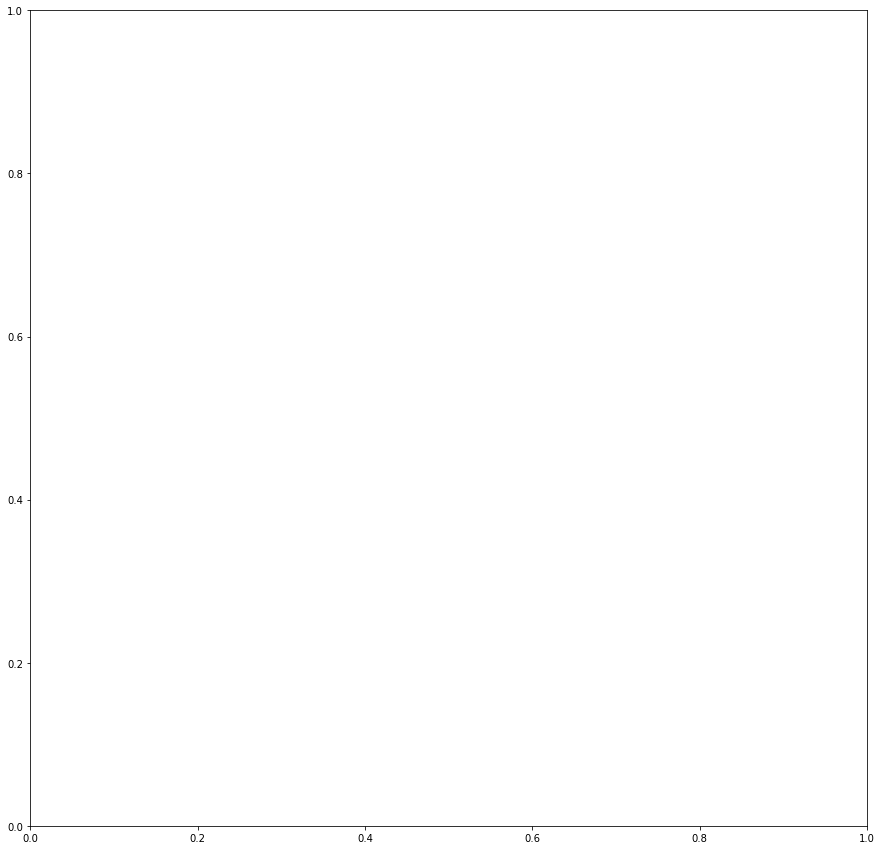

In [375]:
fig, ax = plt.subplots(figsize=(15,15)) #Größe Plot  konfigurieren


for i  in range(len(test_df['boxLenght_1'])):
    ax.scatter(test_df['boxLenght_1'][i],
               test_df['boxWidth_1'][i],
               color=colors[test_df['type'][i]])
    
ax.set_title('VDKI Daten')
ax.set_facecolor((0.1,0.1,0.1))
ax.set_xlabel('Erstes')
ax.set_ylabel('Zweites')

Klassen statt mit Namen mit Zahlen bezeichnen

In [ ]:
test_original_df = test_df #alten dataframe sichern

In [ ]:
type_to_int ={'Dosenoeffner':0,'Flaschenoeffner':1, 'Korkenzieher':2} # Für jede Klasse eindeutige Zahl setzen

test_df['type']=test_df['type'].map(type_to_int) # Klassenspalte überschreiben mit Zahlen
test_df.head()

,approxContureArea_1,approxContureLenght_1,area_1,boxLenght_1,boxWidth_1,convexHullArea_1,convexHullLenght_1,perimeter_1,ratio_1,stein_1,type
0,15227.0,613.032333,13154.0,142.457672,232.322098,24488.5,653.732390,951.931020,1.630815,33.734256,1
1,0.0,255.538651,6440.0,69.397736,127.564507,7544.0,331.871744,865.352374,1.838165,1.000000,1
2,0.0,0.000000,9864.5,178.054352,194.551788,26227.5,637.340997,3885.867428,1.092654,36.235342,2
3,0.0,283.436066,702.5,137.736053,56.527515,5716.0,329.348219,908.423442,2.436620,28.635642,2
4,1643.0,186.091270,3094.5,69.893356,61.984932,3247.5,209.735426,222.409161,1.127586,3.000000,1


Daten Visualieren, Merkmale und Kategorien

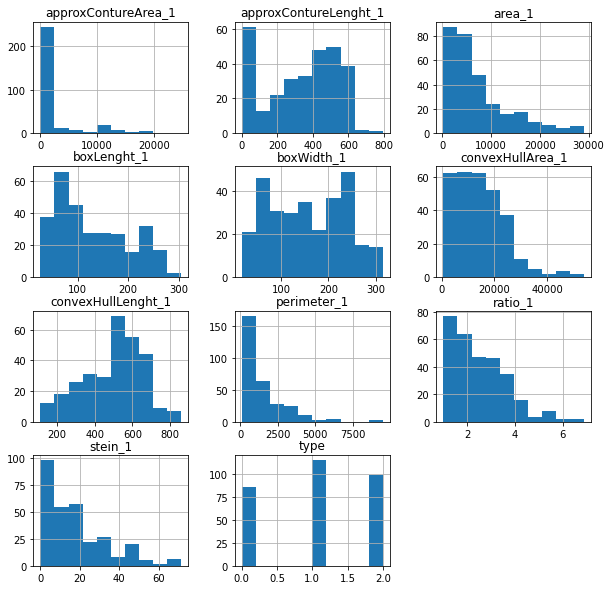

In [ ]:
test_df.hist(figsize=(10,10)) #berechnet Histogramme aller Spalten
plt.show()

Scattermatrix erstellen als schnellen Überblick

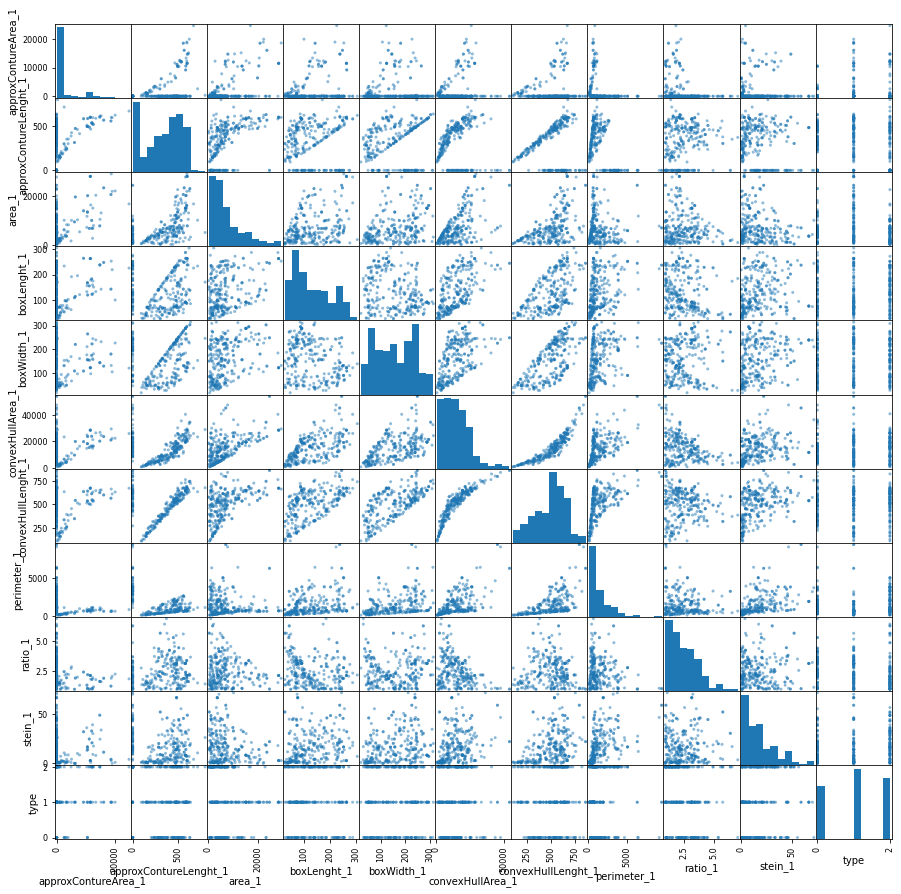

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(test_df,figsize=(15,15))
plt.show()

Erzeuge Trainings- und Testdaten
1. Erzeuge eine Dataframe mit allen Merkmalen, aber nicht der Kategorie (Letzte Spalte)
2. Erzeuge eine Dataframe nur mit der Kategorie (letzte Spalte)

In [ ]:
X = test_df.iloc[:,:-1] #alles außer letzter Spalte
y = test_df.iloc[:,-1] #nur letzte Spalte
print('X: ',X.shape, ' y: ',y.shape)

X:  (300, 10)  y:  (300,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   random_state=42)

print('X_train: ', X_train.shape, ' y_train: ',y_train.shape)
print('X_test: ', X_test.shape, ' y_test: ', y_test.shape)

X_train:  (240, 10)  y_train:  (240,)
X_test:  (60, 10)  y_test:  (60,)


Bayes Klassifikator

In [ ]:
from sklearn.naive_bayes import GaussianNB # importiere Bayes-Klassifikator
bayes_clf = GaussianNB()
bayes_clf.fit(X_train,y_train) #Wende Klassifikator auf Trainingsdaten an

print('Accuracy Bayes: ', bayes_clf.score(X_test, y_test))

Accuracy Bayes:  0.5666666666666667


Accuracy = 1: Kann komplett genau klassifizieren

Weitere Maße außer Accuracy:

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = bayes_clf.predict(X_test) #nimm Testdaten als Vorhersagedaten

print(confusion_matrix(y_test, y_pred))

[[16  5  1]
 [10 12  0]
 [ 8  2  6]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.73      0.57        22
           1       0.63      0.55      0.59        22
           2       0.86      0.38      0.52        16

    accuracy                           0.57        60
   macro avg       0.65      0.55      0.56        60
weighted avg       0.63      0.57      0.56        60



Entscheidungsbaum

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print('Accuracy Decision Tree', tree_clf.score(X_test,y_test)) # Accuracy nach Generalisierung

Accuracy Decision Tree 0.6833333333333333


[Text(146.99812500000002, 206.56799999999998, 'X[7] <= 814.687\ngini = 0.659\nsamples = 240\nvalue = [64, 93, 83]'),
 Text(60.38357142857143, 184.824, 'X[6] <= 537.897\ngini = 0.531\nsamples = 112\nvalue = [21, 71, 20]'),
 Text(55.60071428571429, 163.07999999999998, 'X[1] <= 230.939\ngini = 0.631\nsamples = 80\nvalue = [21, 39, 20]'),
 Text(23.914285714285715, 141.336, 'X[7] <= 433.404\ngini = 0.466\nsamples = 27\nvalue = [0, 17, 10]'),
 Text(19.13142857142857, 119.592, 'X[3] <= 38.775\ngini = 0.386\nsamples = 23\nvalue = [0, 17, 6]'),
 Text(9.565714285714286, 97.848, 'X[3] <= 27.643\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(4.782857142857143, 76.10399999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(14.348571428571429, 76.10399999999998, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(28.697142857142858, 97.848, 'X[9] <= 5.106\ngini = 0.111\nsamples = 17\nvalue = [0, 16, 1]'),
 Text(23.914285714285715, 76.10399999999998, 'gini = 0.0\nsamples = 16\nvalue

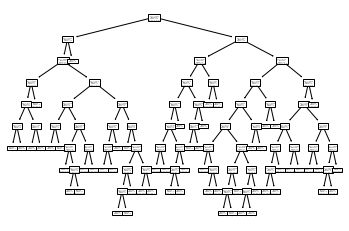

In [ ]:
tree.plot_tree(tree_clf)

Decision Tree anwenden

In [ ]:
y_pred = tree_clf.predict(X_test) #Vorhesage der X_testdaten erzeugen
# hier könnten statt X_test auch andere Dataframes stehen

from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(y_test,y_pred)) #Vergleich Prädiktion mit Test

Accuracy: 0.6833333333333333


In [ ]:
X_testDf = pd.DataFrame([[5.1,2.9,1.6,0.3]],columns=['approxContureArea_1', 'approxContureLenght_1', 'area_1', 'boxLenght_1',
       'boxWidth_1', 'convexHullArea_1', 'convexHullLenght_1', 'index',
       'perimeter_1', 'ratio_1', 'stein_1'])
y_pred = tree_clf.predict(X_testDf)

ValueError: 11 columns passed, passed data had 4 columns

In [ ]:
print('Vorhergesagte Kategorie: ',y_pred)

In [ ]:
y_pred_bayes = bayes_clf.predict(X_testDf)
print('Vorhergesagte Kategorie mit Bayes: ',y_pred_bayes)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=2)

forest_clf.fit(X_train,y_train)

In [ ]:
y_pred_rf = forest_clf.predict(X_test)
print('Accuracy Random Forest: ', accuracy_score(y_test,y_pred_rf))